# Student Performance Indicator


#### Life cycle of Machine Learning Project

- Understanding the problem statement
- Data collection
- Data checks to perform
- Exploratory Data Analysis
- Data Preprocessing
- Model training
- Choose Best Model




### 1) Problem Statement
- This Project understands how the student's Perfoemance(test Scores) is affected by the other variables such as gender , Ethnicity, parental level of education ,Lunch and Test Preperation course.

### 2) Data Collection
- Data is taken form a kaggle dataset
- the data consists of 8 column and 1000 rows.


### 2.1 Import Data and Required Packages 
#### Importing Pandas,Numpy ,Matplotli, Seaborn and Warnings Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings("ignore")
import seaborn as sns

### import the csv data as Pandas Dataframe

In [2]:
df=pd.read_csv("stud.csv")

In [3]:
df.head(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### shape of dataset

In [4]:
df.shape

(1000, 8)

### 3.1 Check missing Values

In [5]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

#### There is no missing values

 ## 3.2 Check Duplicates



In [6]:
df.duplicated().sum()

0

#### there is no duplicate values

## 3.3 Check datatypes

In [7]:
## check null and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


## 3.4 Checking the number of Unique Values of each column

In [8]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

## 3.5 Check statistics of data set

In [9]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### insights about numerical variables
- from above statistical analysis the mean of all subject score is around same
- the standard deviation is between 14.6 and 15.19


### 3.7 Exploring Data


In [10]:
### lets save all the column headings in a list
col_heading_list=df.columns.tolist()
for i in col_heading_list:
    if df[i].dtype == "object":
        print("Categories in {} variablle:   ".format(i),end=" ")
        print (df[i].unique())
    
   

Categories in gender variablle:    ['female' 'male']
Categories in race_ethnicity variablle:    ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental_level_of_education variablle:    ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch variablle:    ['standard' 'free/reduced']
Categories in test_preparation_course variablle:    ['none' 'completed']


In [11]:
### define numerical and categorical features
numerical_features=[i for i in df.columns if df[i].dtype =="int64"]
categorical_features=[i for i in df.columns if df[i].dtype =="object"]
print("We have {} numerical features : {}".format(len(numerical_features),numerical_features))
print("We have {} categorical features : {}".format(len(categorical_features),categorical_features))

We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']
We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


### 3. 8 Adding two more columns

In [12]:
df["Total_Score"]=df['math_score']+df['reading_score']+df['writing_score']
df["Average"]=df["Total_Score"]/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_Score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


## Exploring Data 


## Visualise average score distribution to make some conclusion

- Histogram
- Kernal Distribution Function (KDE)

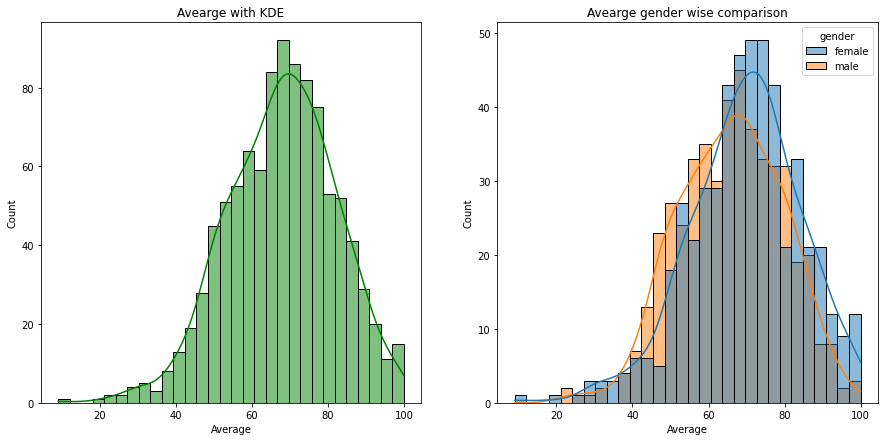

In [13]:
fig,axs=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='Average',bins=30,kde=True,color="g").set(title="Avearge with KDE")
plt.subplot(122)
sns.histplot(data=df,x=
            'Average',bins=30,kde=True,hue="gender").set(title="Avearge gender wise comparison")
plt.show()

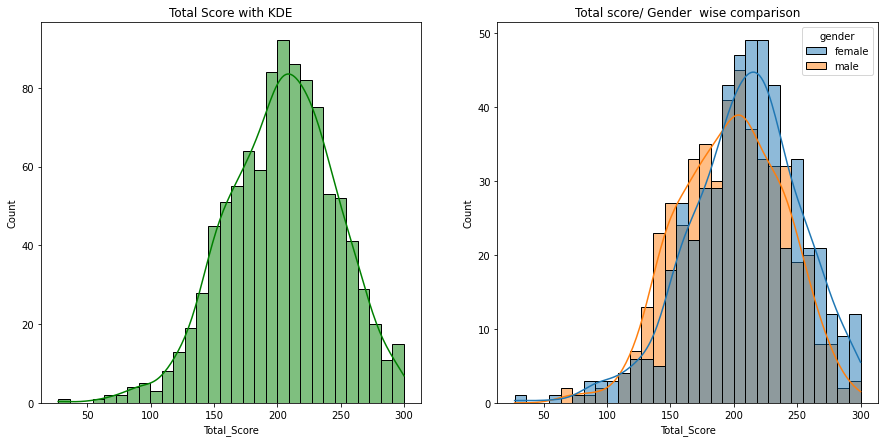

In [14]:
fig,axs=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='Total_Score',bins=30,kde=True,color="g").set(title="Total Score with KDE")
plt.subplot(122)
sns.histplot(data=df,x=
            'Total_Score',bins=30,kde=True,hue="gender").set(title="Total score/ Gender  wise comparison")
plt.show()

##### Insights
- Right side shifted gaussian distribution of average marks can be seen and the majority of female Gender performed well

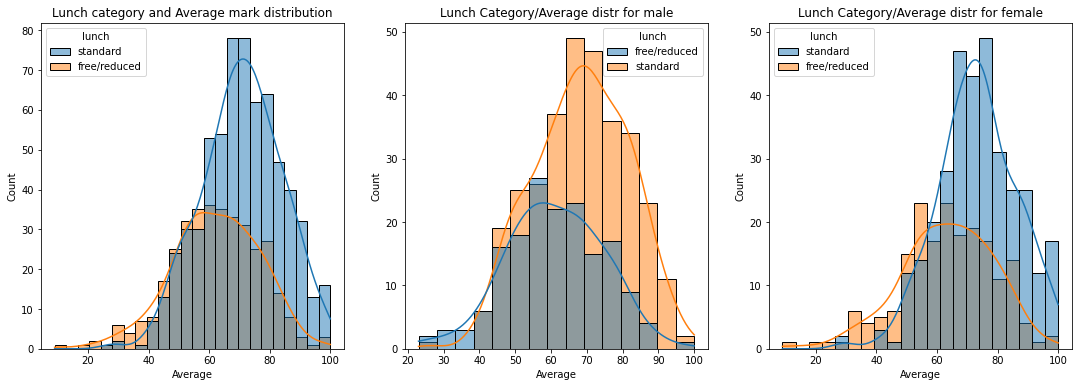

In [15]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='Average',kde=True,hue="lunch").set(
    title="Lunch category and Average mark distribution")
plt.subplot(142)
sns.histplot(data=df[df['gender']=='male'],x='Average',kde=True,hue='lunch').set(
    title='Lunch Category/Average distr for male')
plt.subplot(143)
sns.histplot(data=df[df['gender']=='female'],x='Average',kde=True,hue='lunch').set(
    title='Lunch Category/Average distr for female')
plt.show()


#### Insights from Lunch -standard ,free/Reduced and Marks 


- standard lunch helps to perform well in exams irrespective of gender 

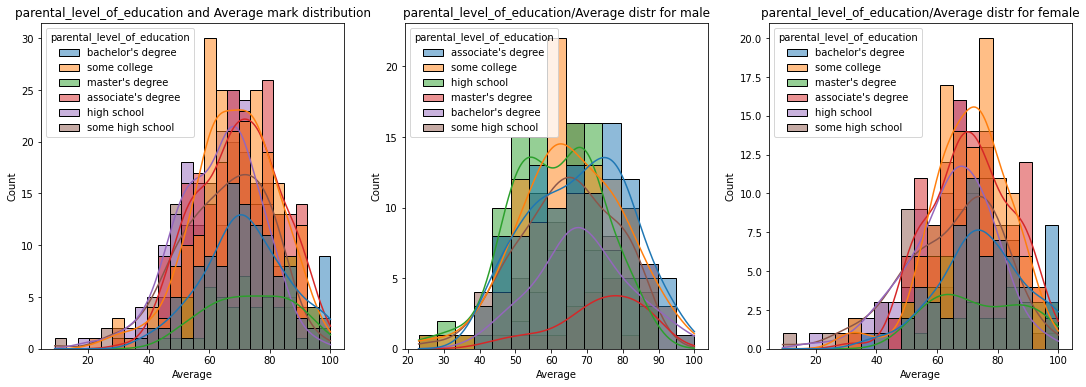

In [16]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='Average',kde=True,hue="parental_level_of_education").set(
    title="parental_level_of_education and Average mark distribution")
plt.subplot(142)
sns.histplot(data=df[df['gender']=='male'],x='Average',kde=True,hue='parental_level_of_education').set(
    title='parental_level_of_education/Average distr for male')
plt.subplot(143)
sns.histplot(data=df[df['gender']=='female'],x='Average',kde=True,hue='parental_level_of_education').set(
    title='parental_level_of_education/Average distr for female')
plt.show()


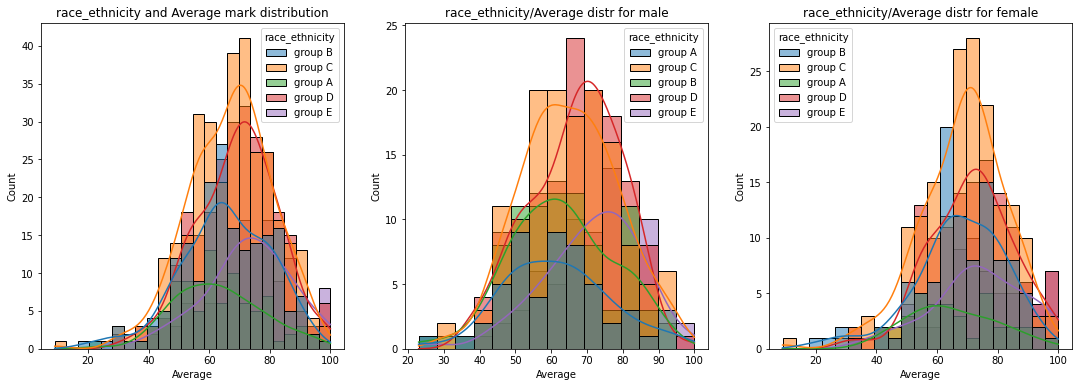

In [17]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='Average',kde=True,hue="race_ethnicity").set(
    title="race_ethnicity and Average mark distribution")
plt.subplot(142)
sns.histplot(data=df[df['gender']=='male'],x='Average',kde=True,hue='race_ethnicity').set(
    title='race_ethnicity/Average distr for male')
plt.subplot(143)
sns.histplot(data=df[df['gender']=='female'],x='Average',kde=True,hue='race_ethnicity').set(
    title='race_ethnicity/Average distr for female')
plt.show()


#### Maximum score of students in all three subjects


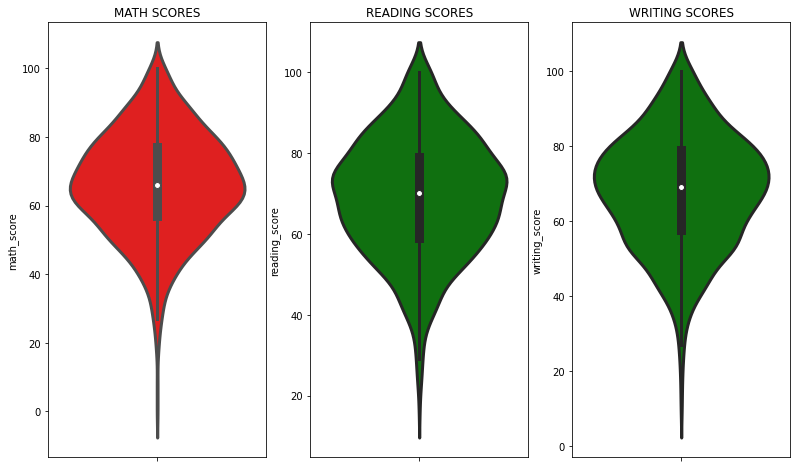

In [18]:
plt.figure(figsize=(18,8))
plt.subplot(1,4,1)

sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.title('MATH SCORES')

plt.subplot(1,4,2)
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.title('READING SCORES')
plt.subplot(1,4,3)

sns.violinplot(y='writing_score',data=df,color='green',linewidth=3)
plt.title('WRITING SCORES')
plt.show()

#### insights from viloin plot 
- for writing and reading the scores are spreaded for majority students is in between 50 and 80


### Multi Variate Analysis using pieplot

<function matplotlib.pyplot.show(close=None, block=None)>

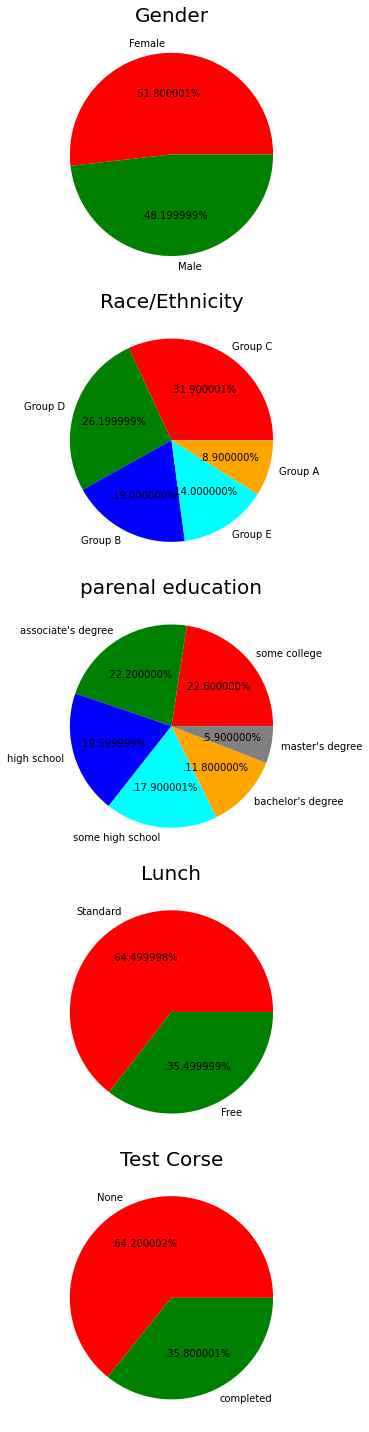

In [19]:

plt.rcParams['figure.figsize'] = (30,20)


plt.subplot(5,1,1)
size=df['gender'].value_counts()
labels='Female','Male'
color=['red','green']

plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')####2decimal place
plt.title('Gender',fontsize=20)
plt.axis=('off')##to turn off the axis lines and labels


plt.subplot(5,1,2)
size=df['race_ethnicity'].value_counts()
labels='Group C','Group D','Group B','Group E','Group A'
color=['red','green','blue','cyan','orange']

plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title("Race/Ethnicity",fontsize=20)


plt.subplot(5,1,3)
size=df['parental_level_of_education'].value_counts()
labels='some college',"associate's degree",'high school','some high school',"bachelor's degree","master's degree"
color=['red','green','blue','cyan','orange','grey']

plt.pie(size,labels=labels,colors=color,autopct='.%2f%%')
plt.title("parenal education",fontsize=20)
plt.axis=('off')

plt.subplot(5,1,4)
size=df['lunch'].value_counts()
labels='Standard','Free'
color=['red','green']

plt.pie(size,labels=labels,colors=color,autopct='.%2f%%')
plt.title("Lunch",fontsize=20)
plt.axis=('off')

plt.subplot(5,1,5)
size=df['test_preparation_course'].value_counts()
labels='None','completed'
color=['red','green']

plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title('Test Corse',fontsize=20)
plt.axis=('off')

plt.tight_layout()## is used to automatically adjust the spacing between subplots to prevent overlapping labels, titles, and other elements
plt.grid()##add grid lines to the plot, which can help in aligning data points and understanding proportions visually.

plt.show

### Insights
- Number of male and female students are almost equal
- Race of ethnicity belong to group C have most students
- Number of students who have standard lunch is higher 
- Number of students who have not enrolled in any test preperation course is greater
- number of students whose parental education is some college is greater followed by an associate degree

## Feature wise Visualisation

### Gender column

- How is distribution of gender?
- Is gender has any impact on students performance?


### Univariate analysis

In [20]:
!pip install matplotlib==3.4 --user

[<BarContainer object of 2 artists>]

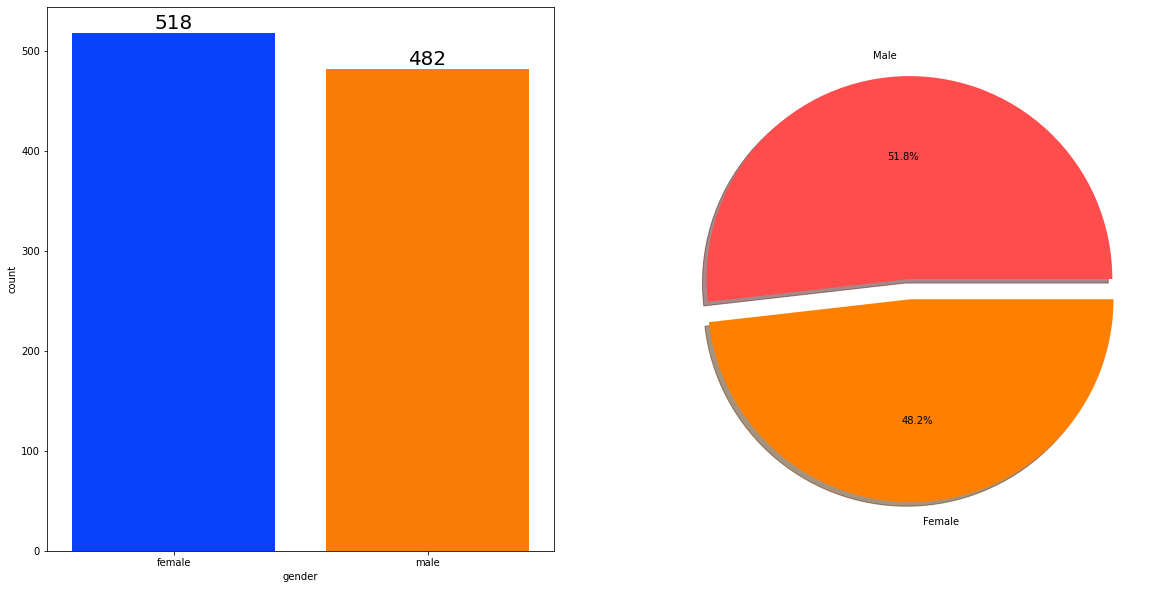

In [23]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))
sns.countplot(x=df['gender'],data=df,palette='bright',ax=ax[0],saturation=.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

plt.pie(x=df['gender'].value_counts(),labels=["Male","Female"],
        explode=[0,0.1],autopct='%1.1f%%',shadow=True,
        colors=['#ff4d4d','#ff8000'])
plt.show


### Insights
- Gender has balanced data with female students are 518(52%) and male students are 482(48%)

### Bivariate Anaysis (is gender has any impact on students performance ?)

In [33]:
gender_group=df.groupby('gender').mean()
gender_group



,math_score,reading_score,writing_score,Total_Score,Average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


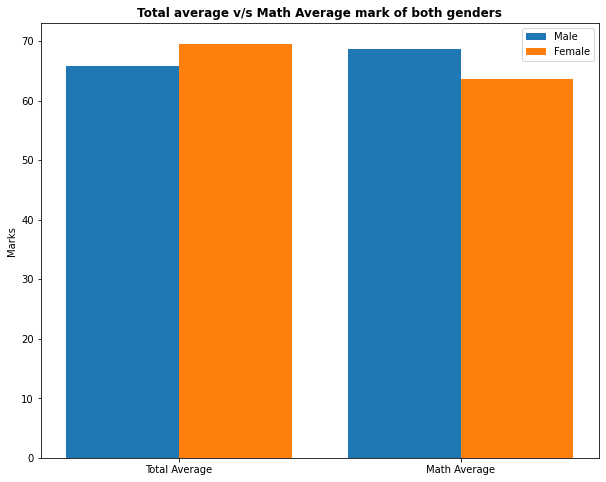

In [40]:
plt.figure(figsize=(10,8))
X=['Total Average','Math Average']

male_scores = [gender_group['Average'][1], gender_group['math_score'][1]] 
female_scores = [gender_group['Average'][0], gender_group['math_score'][0]]

X_axis=np.arange(len(X))
plt.bar(X_axis-0.2,male_scores,0.4,label="Male")
plt.bar(X_axis+.2,female_scores,0.4,label='Female')

plt.xticks(X_axis,X)
plt.ylabel("Marks")
plt.title("Total average v/s Math Average mark of both genders",fontweight='bold')
plt.legend()
plt.show()

### insights
- on average female stuents scores better
- but for maths male students scored more

## Race /ethnicity

- How is Group wise distribution?
- Is Race/ethnicity has any impact on students performance?


### Univariate Analysis (How Group wise distribution?)|

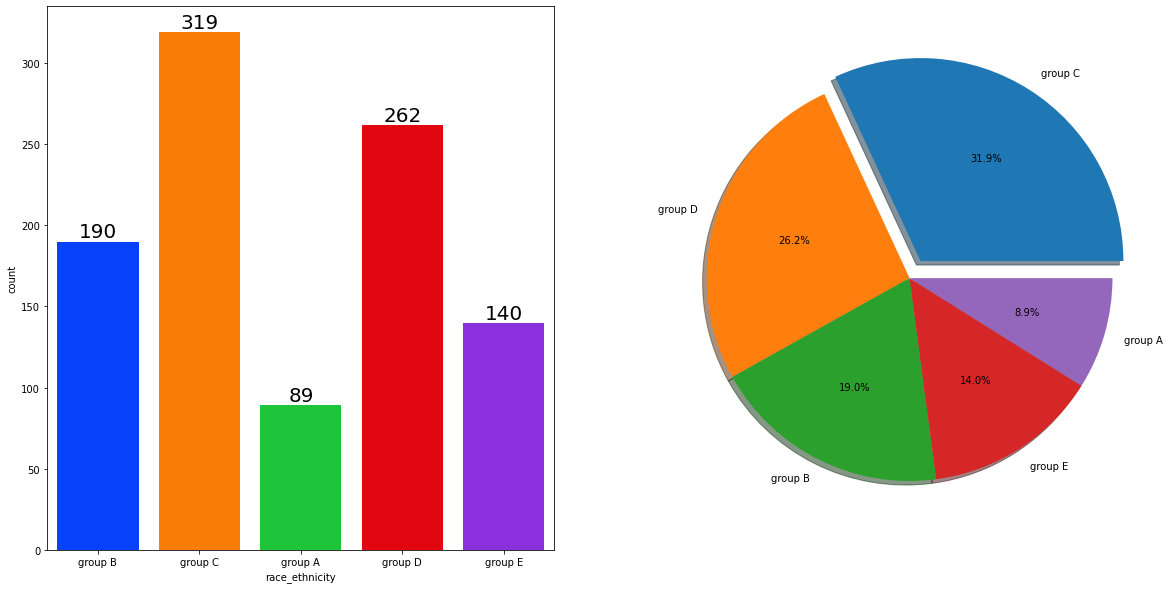

In [44]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))
sns.countplot(x=df['race_ethnicity'],data=df,palette='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
plt.pie(x=df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()

### Insights

- Group C and Group D belonging students is higher
- Lowest number of students belong to Group A

### Bivariate Analysis (Is Race/ethnicity has any impact on students performance?)

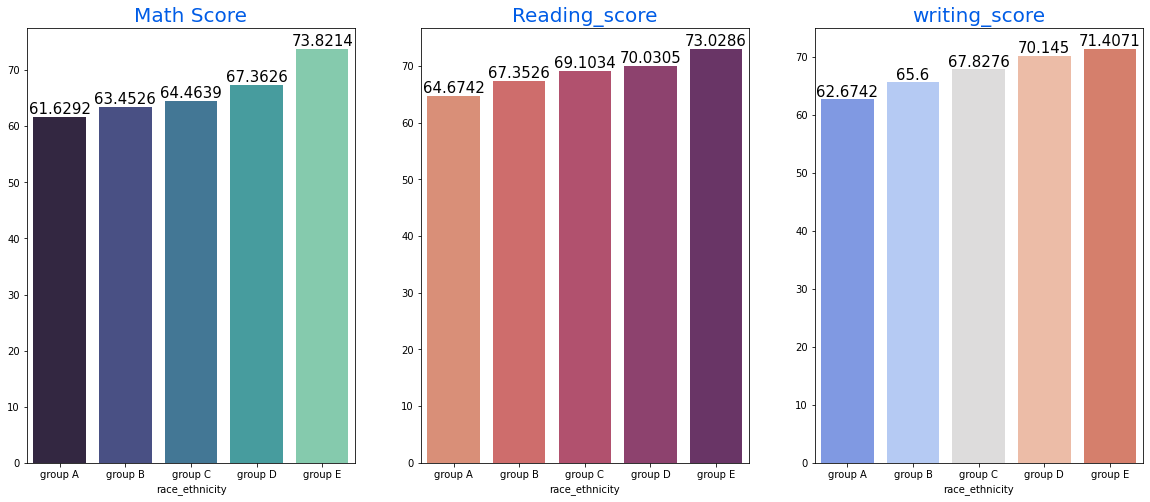

In [49]:
Group_data2=df.groupby('race_ethnicity')
f, ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette='mako',ax=ax[0])
ax[0].set_title('Math Score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)
    
sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette='flare',ax=ax[1])
ax[1].set_title('Reading_score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette='coolwarm',ax=ax[2])
ax[2].set_title("writing_score",color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

### Insights
- Group E have scored highest marks in all.
- Group A have scored the lowest marks.


## Parental Level of education

- What is educational background of student's parent?
- Is parental education has any impact on student's performance?


### Univariate Analysis(What is educational background of students parent?

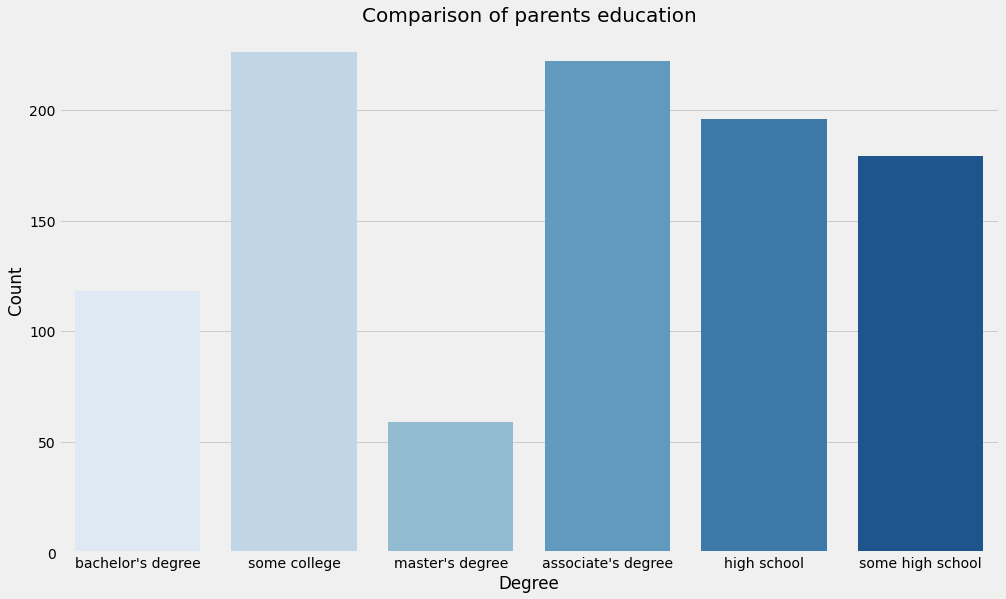

In [50]:
plt.rcParams['figure.figsize']=(15,9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'],palette='Blues')
plt.title('Comparison of parents education', fontweight=30,fontsize=20)
plt.xlabel("Degree")
plt.ylabel('Count')
plt.show()



### Insights
- Largest number of parents are from some college

### Bivariate Analysis(Is parental education has nay impact on students perfomance?)


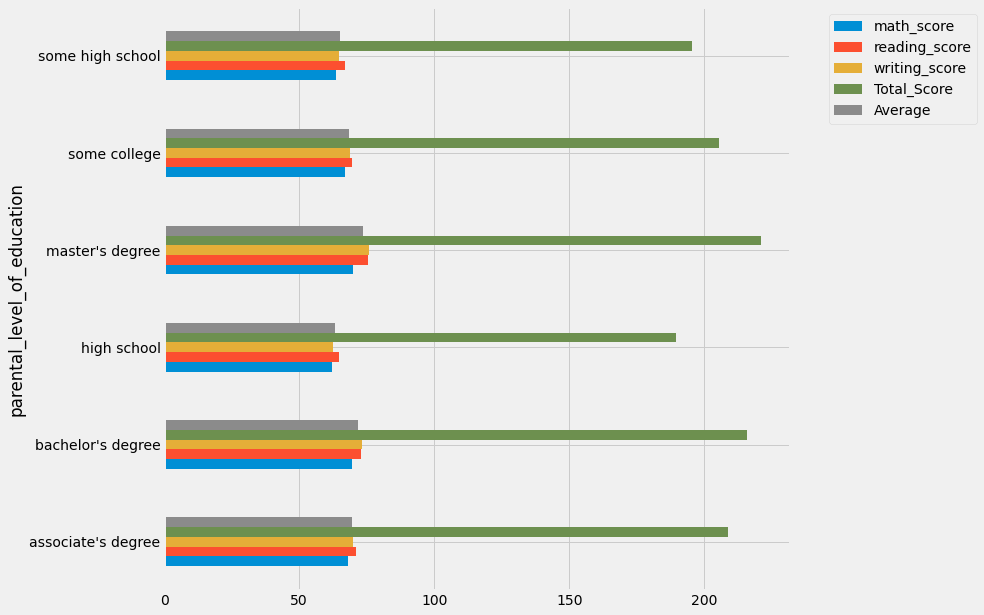

In [51]:
df.groupby('parental_level_of_education').agg('mean').plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05,1),loc=2)
plt.show()

### Insights

- The score of student whose parents possess master and bachelor level education are higher than others .

## Lunch Column

- which type of lunch is most common among students?
- what is the effect of lunch type on test results

### Univariate Analysis (Which type of Lunch is common among students?

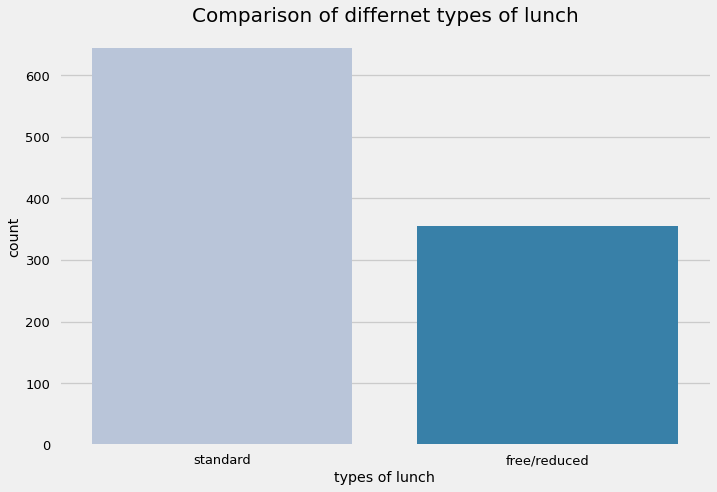

In [52]:
plt.rcParams['figure.figsize']=(15,9)
plt.style.use('seaborn-talk')
sns.countplot(df['lunch'],palette='PuBu')
plt.title('Comparison of differnet types of lunch',fontweight=30,fontsize=20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

### Insights

- Students which served Standard food is more than free lunch

## Bivariate Analysis(Is lunch type intake has any impact on studets performance ?)


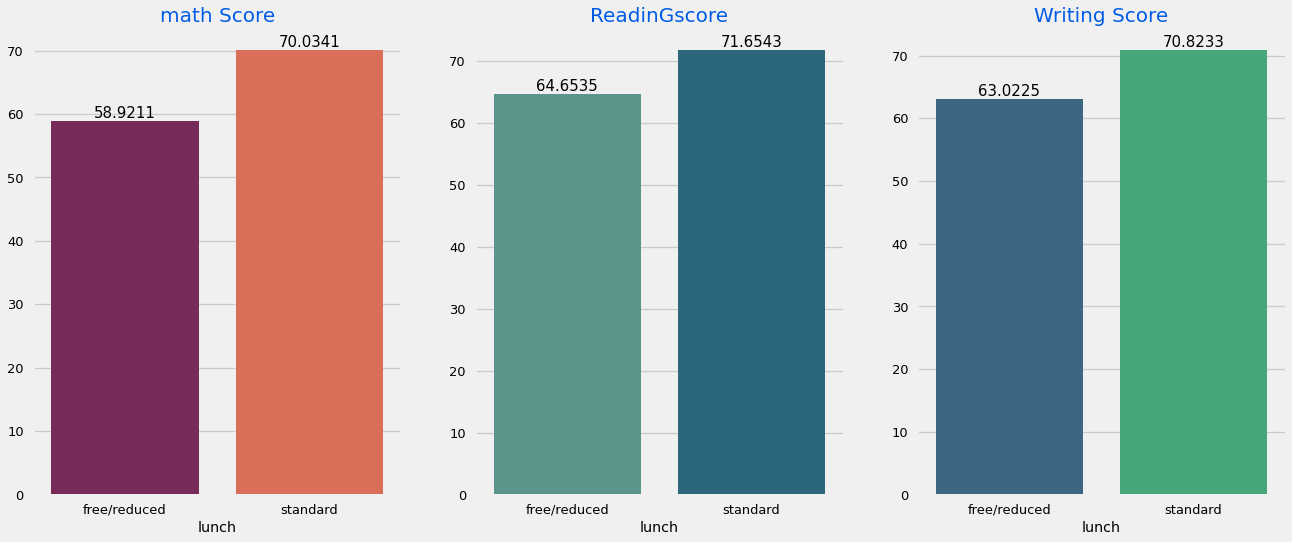

In [58]:





lunch_grpby=df.groupby('lunch')
f, ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=lunch_grpby['math_score'].mean().index,y=lunch_grpby['math_score'].mean().values,palette='rocket',ax=ax[0])
ax[0].set_title("math Score",color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=lunch_grpby['reading_score'].mean().index,y=lunch_grpby['reading_score'].mean().values,palette='crest',ax=ax[1])
ax[1].set_title("ReadinGscore",color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)


sns.barplot(x=lunch_grpby['writing_score'].mean().index,y=lunch_grpby['writing_score'].mean().values,palette='viridis',ax=ax[2])
ax[2].set_title("Writing Score",color='#005ce6',size=20)    

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)



#### Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

### Test Preperation course column

## Bivariate Analysis (is test preperation course has any imapct on students performance ?)

<AxesSubplot:xlabel='test_preparation_course', ylabel='writing_score'>

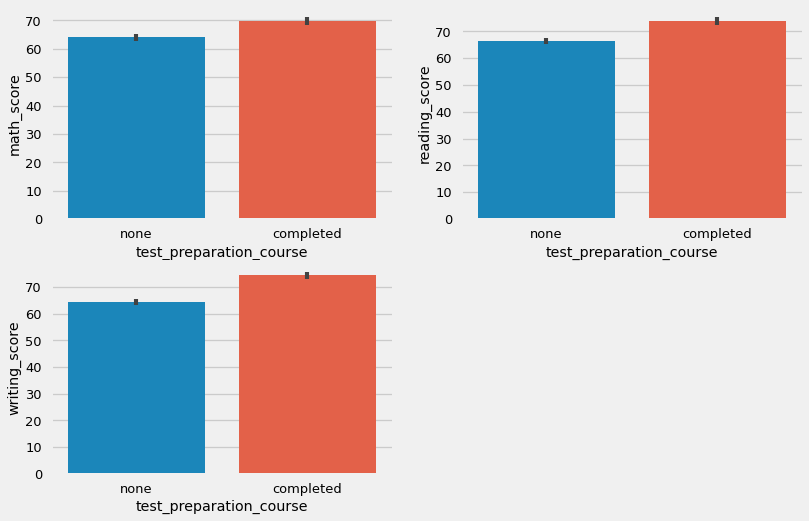

In [61]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.barplot(x=df['test_preparation_course'],y=df['math_score'])

plt.subplot(2,2,2)
sns.barplot(x=df['test_preparation_course'],y=df['reading_score'])

plt.subplot(2,2,3)
sns.barplot(x=df['test_preparation_course'],y=df['writing_score'])

### Insights

- students who have completed Test preperation course have scores higher in all three subjects

## Checking Outliers

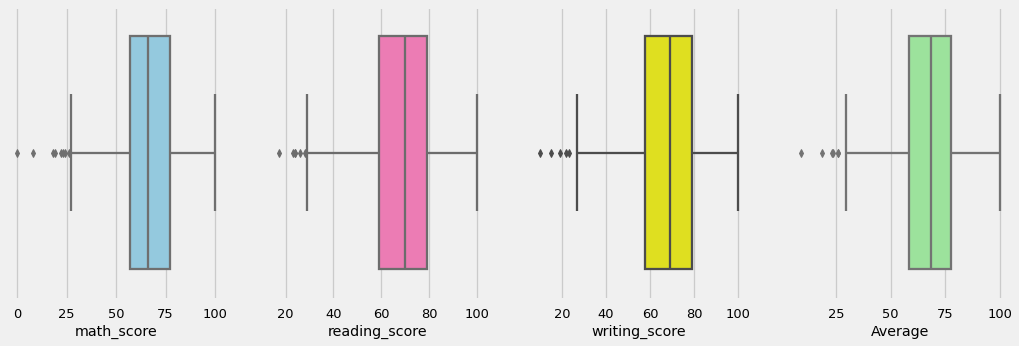

In [62]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['Average'],color='lightgreen')
plt.show()

## Multivariate Analysis

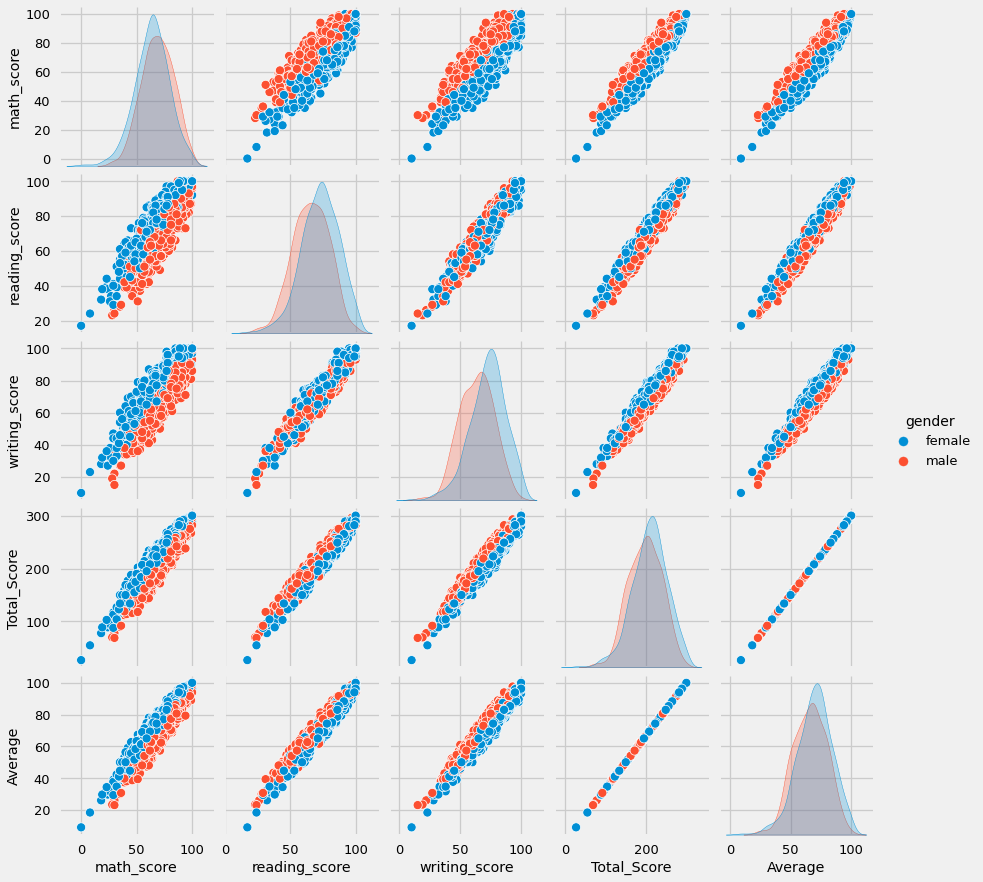

In [63]:
sns.pairplot(df,hue='gender')
plt.show()